In [2]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter
from scipy.ndimage import gaussian_filter

In [7]:
data = loadmat('Brain.mat')
T1 = data['T1']
labels = data['label']
image = T1[:, :, 0]
smoothed_slice = gaussian_filter(image, sigma=1)
print(image.shape)
print(T1.shape)

(362, 434)
(362, 434, 10)


In [5]:
img = T1[0]
print(img.shape)

(434, 10)


In [6]:
seeds = [(45, 36), (107, 98), (175, 279), (132, 269), (39, 272), (53, 90)]
for x,y in enumerate(seeds):
    print(x,y)
    

0 (45, 36)
1 (107, 98)
2 (175, 279)
3 (132, 269)
4 (39, 272)
5 (53, 90)


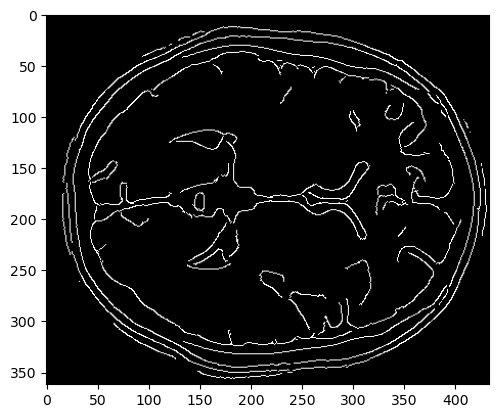

In [20]:
import cv2
from scipy.ndimage import gaussian_filter

def edgeDetection(image):
    # 使用Canny算法进行边缘检测
    edges = cv2.Canny(image, 100, 200)
    return edges


def normalize_and_detect_edges(img, lower_threshold, upper_threshold):
    # 将图像强度范围从0-50000归一化到0-255
    img_normalized = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img_normalized = img_normalized.astype(np.uint8)  # 转换数据类型为uint8

    # 应用Canny边缘检测
    edges = cv2.Canny(image=img_normalized, threshold1=lower_threshold, threshold2=upper_threshold)

    return edges

image = gaussian_filter(image, sigma=1)


img = normalize_and_detect_edges(img=image, lower_threshold=10, upper_threshold=100) 

plt.imshow(img, cmap='gray')